# Real time crawling of tweets from Twitter and creating a network of user mentions

### Step 1: Install and import tweepy library

In [1]:
import os
import tweepy as tw
import pandas as pd

### Step 2: Sign up your twitter developer account and obtain the following credentials (https://developer.twitter.com/en)

In [2]:
consumer_key= 'oT4yaDlrCtM8PccDnTOthwVhT'
consumer_secret= 'QfRyF7kRd7eoLQMEm9899rXAuJm8iI7VRsoRaqGx1ZkynpyRzv'
access_token= '1347484634452434944-dN0cnvWOyBMSF2FcTQlobR8liYPm36'
access_token_secret= 'g55tSqXi2JmzUFPH4PdoFT3Ugc6LBOMlmITDVIfN9wG1K'

### Step 3: Using the above credentials get yourself authorized to stream real time tweets using the code snippet below

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [4]:
search_terms = "#covid19 -in:retweets"

In [5]:
MY_BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAADnTfAEAAAAAYn8fJiFqzrTbKDOo0km%2F6A6XjbU%3DlcmeNBkEhVX8AMRNKA1OlHdC44sB90DrLsgvqMDH0pfVELwsyH'

client = tw.Client(bearer_token=MY_BEARER_TOKEN)

In [6]:
search_query = "#covid19 -in:retweets"

In [8]:
# query to search for tweets
query = "#covid19 "

# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                    
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 10,
                                     expansions='author_id'
                                     )

In [9]:
tweets

Response(data=[<Tweet id=1587658959904989184 text='¡Together And United, VS The Coronavirus #Covid19 To The End! 😉👍\n\n#TheLegendOfTheNahuala\n\n#LeoSanJuan\n\n#Puebla\n\n#Mexico 🇲🇽\n\n#DiaDeMuertos \n\n#VivaMéxico\n\n¡International Animated Feature Film Of My Country #Mexico 🇲🇽!\n\n@TheAcademy\n\n@CocaCola\n\n#Oscars\n\n🎬⭐'>, <Tweet id=1587658957094588417 text='$DYAI #COVID19 https://t.co/uP8AqasOB1'>, <Tweet id=1587658957061263360 text='RT @delcyrodriguezv: 4/4 Garantizar la protección a la salud de los venezolan@s es prioridad del Pdte. @NicolasMaduro. Ratificamos que la v…'>, <Tweet id=1587658947250589697 text='RT @keetmuise: We have to learn to live with terrorists, they will get us all eventually anyway. \n\nRallying call if 9/11 happened in Januar…'>, <Tweet id=1587658925003915266 text='RT @jewels4meee: 🧵Ever since #Pfizer’s executive recently &amp; infamously claimed the #vaccine maker never tested its shots for efficacy at pr…'>, <Tweet id=1587658924655669249 text='RT @HLGatel

### Step 4: Using the API object search tweets of your interest using a particular hashtag

In [10]:
# import the pandas library
import pandas as pd

# create a list of records
tweet_info_ls = []

# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)

# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-11-02 04:12:47+00:00,"¡Together And United, VS The Coronavirus #Covi...",Twitter for Android,Fernando Ortíz Fabián,ferspeed2609,None,False,Naci El 26 De Septiembre De 1997 En Un Hospita...
1,2022-11-02 04:12:47+00:00,$DYAI #COVID19 https://t.co/uP8AqasOB1,Twitter for iPhone,Dividend Fella 👓💰,dividendfella,None,False,Building an Inflation-Proof Dividend Portfolio...
2,2022-11-02 04:12:47+00:00,RT @delcyrodriguezv: 4/4 Garantizar la protecc...,Twitter for Android,gutierrez,guti8842663,Venezuela,False,Viva chavez
3,2022-11-02 04:12:44+00:00,RT @keetmuise: We have to learn to live with t...,Twitter,Patent Masks Research & Development,PatentMasks,"London, United Kingdom",False,We are currently focusing on producing and man...
4,2022-11-02 04:12:39+00:00,RT @jewels4meee: 🧵Ever since #Pfizer’s executi...,Twitter,Xitlaly,xzugarazo,México Distrito Federal,False,


### Step 6: Import the networkx package

In [11]:
import networkx as nx

### Step 7: First create a basic network with few nodes and edges

In [12]:
G= nx.Graph()
G.add_nodes_from(["A","B"])
G.add_edge('A',"B")
G.nodes()

NodeView(('A', 'B'))

In [13]:
G.nodes['A']['Age']=21
G.nodes['B']['Age']=22
G.edges['A','B']['Friendship']= '2019/04/21'

In [14]:
G.nodes(data=True)

NodeDataView({'A': {'Age': 21}, 'B': {'Age': 22}})

In [15]:
G.add_edge(1, 2)
G.edges()

EdgeView([('A', 'B'), (1, 2)])

In [16]:
G.edges(data= True)

EdgeDataView([('A', 'B', {'Friendship': '2019/04/21'}), (1, 2, {})])

In [17]:
eg=[(1,2),(1,3),(1,4),(1,5),(1,6)]
H=nx.Graph(eg)

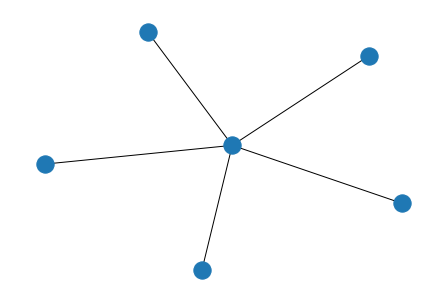

In [18]:
nx.draw(H)